<a href="https://colab.research.google.com/github/giammyjeck/MLDL-Pose-Estimation/blob/main/Exploring_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EXPLORING DATASET**

In [ ]:
# Step 1: Download the dataset (LineMOD)
# Download LineMOD dataset
!mkdir -p datasets/linemod/
%cd /content/datasets/linemod/

/content/datasets/linemod


In [ ]:
# Download DenseFusion Folder (Which includes a portion of the LimeMOD dataset)

!gdown --folder "https://drive.google.com/drive/folders/19ivHpaKm9dOrr12fzC8IDFczWRPFxho7"
%cd DenseFusion/
!unzip Linemod_preprocessed.zip

Streaming output truncated to the last 5000 lines.
  inflating: Linemod_preprocessed/segnet_results/11_label/0206_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0207_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0208_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0209_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0210_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0211_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0212_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0213_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0214_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0215_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0216_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0218_label.png  
  inflating: Linemod_preprocessed/segnet_results/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/ML_Project/DenseFusion/Linemod_preprocessed.zip

Streaming output truncated to the last 5000 lines.
  inflating: Linemod_preprocessed/segnet_results/11_label/0201_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0202_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0203_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0204_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0205_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0206_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0207_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0208_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0209_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0210_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0211_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0212_label.png  
  inflating: Linemod_preprocessed/segnet_results/

In [ ]:
!pip install pcl
!pip install open3d

  Preparing metadata (setup.py) ... done
  Created wheel for pcl: filename=pcl-0.0.0.post1-py3-none-any.whl size=1690 sha256=f88a820f1a994d39bf0f2b787102db114933cebf300d25c564e37df3669e7ca2
  Stored in directory: /root/.cache/pip/wheels/1b/bb/f6/c265bd6290eba943c39fb0181f694c57c2bf0d24f8348f7219
Successfully built pcl
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.4 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnb

In [ ]:
# Imports.
import os
import yaml
import torch
import open3d as o3d
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import matplotlib.patches as patches
# Adding.
from scipy.spatial.transform import Rotation as R
import random

In [ ]:
#%cd /content/datasets

In [ ]:
#%cd linemod

In [ ]:
#%pwd

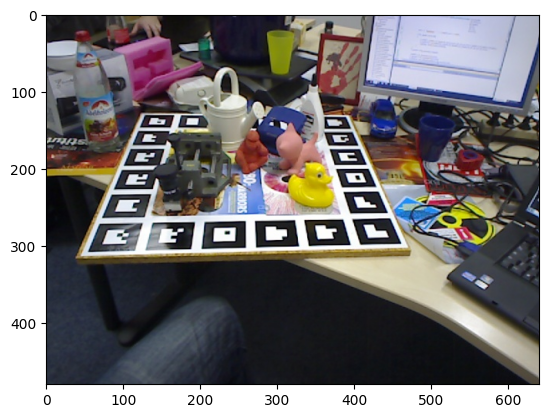

In [ ]:
img_path = "/content/datasets/linemod/DenseFusion/Linemod_preprocessed/data/01/rgb/0000.png"
# Visualizing one image.
img = Image.open(img_path).convert("RGB")
plt.imshow(img)

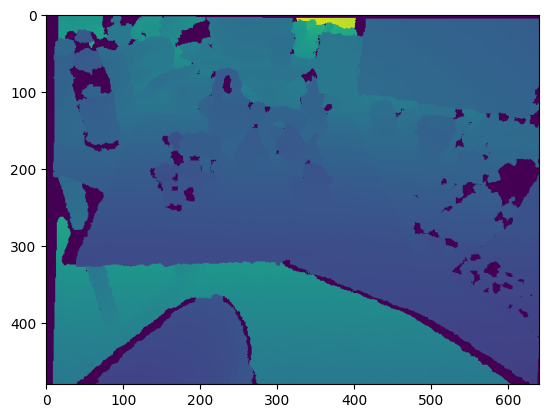

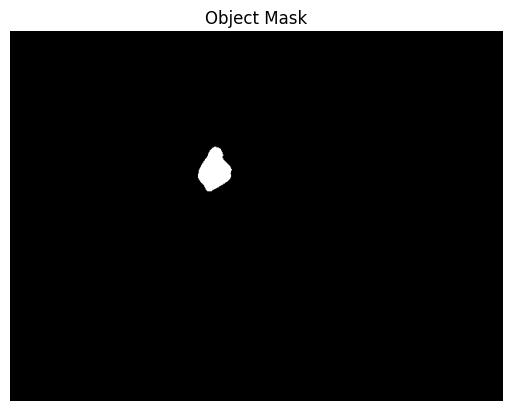

In [ ]:
# Visualizing depth infos.
img_path = "/content/datasets/linemod/DenseFusion/Linemod_preprocessed/data/01/depth/0000.png"
img = Image.open(img_path)
plt.imshow(img)
# Visualizing object mask.
mask_path = "/content/datasets/linemod/DenseFusion/Linemod_preprocessed/data/01/mask/0000.png"
mask_img = Image.open(mask_path)
plt.figure()
plt.imshow(mask_img, cmap='gray')
plt.title("Object Mask")
plt.axis('off')
plt.show()

In [ ]:
pose_file = "/content/datasets/linemod/DenseFusion/Linemod_preprocessed/data/01/gt.yml"
# Load the ground truth poses from the gt.yml file.
with open(pose_file, 'r') as f:
  pose_data = yaml.load(f, Loader=yaml.FullLoader)
pose = pose_data[1][0]

In [ ]:
print(pose.keys()) # Information inside file.
# 6D pose is stored as (3x3) and (3x1)

dict_keys(['cam_R_m2c', 'cam_t_m2c', 'obj_bb', 'obj_id'])


In [ ]:
# Bounding box infos.
bbox = np.array(pose['obj_bb'], dtype=np.float32) #[4]
obj_id = np.array(pose['obj_id'], dtype=np.float32) #[1]
print("BOUNDING BOX: ", bbox)
print("OBJECT ID: ", obj_id)
# Bounding box is stored as [x,y,w,h] in pixel units.
# Obj id track which object class the pose refers to.

BOUNDING BOX:  [234. 151.  44.  58.]
OBJECT ID:  1.0


In [ ]:
# Model infos.
model_path = "/content/datasets/linemod/DenseFusion/Linemod_preprocessed/models/obj_01.ply"
mesh = o3d.io.read_triangle_mesh(model_path)

if mesh.is_empty():
    print("Failed to load the 3D model.")
else:
    print("3D Model loaded successfully.")
    o3d.visualization.draw_geometries([mesh], window_name="3D Model Visualization")

3D Model loaded successfully.
[Open3D WARNING] GLFW initialized for headless rendering.
[Open3D WARNING] GLFW Error: OSMesa: Library not found
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


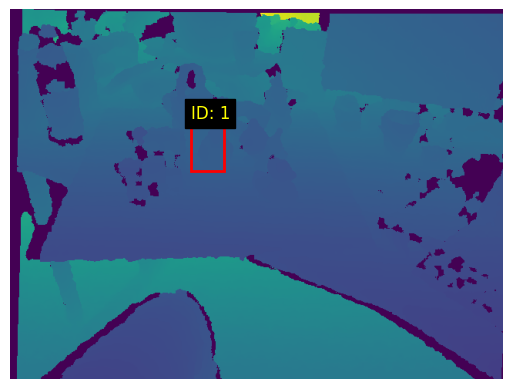

In [ ]:
# Plot image with bounding box.
fig, ax = plt.subplots()
ax.imshow(img)

# Create a rectangle patch.
rect = patches.Rectangle(
    (bbox[0], bbox[1]),  # (x, y)
    bbox[2],             # width
    bbox[3],             # height
    linewidth=2,
    edgecolor='red',
    facecolor='none'
)

# Add the rectangle to the plot.
ax.add_patch(rect)

# Optionally add object ID label.
ax.text(bbox[0], bbox[1] - 10, f'ID: {int(obj_id)}', color='yellow', fontsize=12, backgroundcolor='black')

plt.axis('off')
plt.show()

Rotation Matrix:
 [[ 0.0963063   0.99404401  0.0510079 ]
 [ 0.57332098 -0.0135081  -0.81922001]
 [-0.81365103  0.10814    -0.57120699]]
Translation Vector (mm):
 [-105.3577515  -117.52119142 1014.8770132 ]
Homogeneous Transformation Matrix:
 [[ 9.63063000e-02  9.94044010e-01  5.10079000e-02 -1.05357752e+02]
 [ 5.73320980e-01 -1.35081000e-02 -8.19220010e-01 -1.17521191e+02]
 [-8.13651030e-01  1.08140000e-01 -5.71206990e-01  1.01487701e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Quaternion [x, y, z, w]: [ 0.64827097  0.60444039 -0.29410655  0.35762815]


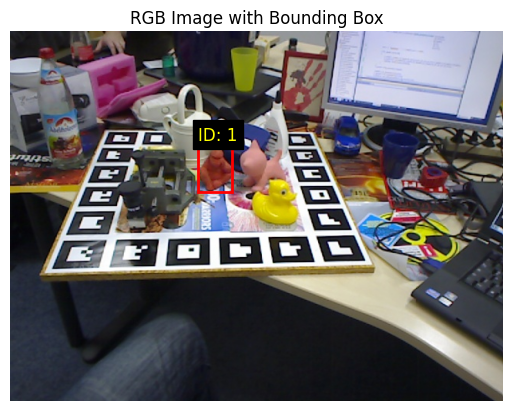

In [ ]:
# Configuration for one image
base_dir = "/content/datasets/linemod/DenseFusion/Linemod_preprocessed/data/01"
img_id = "0000"
# File paths
rgb_path = os.path.join(base_dir, "rgb", f"{img_id}.png")
depth_path = os.path.join(base_dir, "depth", f"{img_id}.png")
pose_file = os.path.join(base_dir, "gt.yml")
# Load data.
rgb_img = Image.open(rgb_path).convert("RGB")
depth_img = Image.open(depth_path)
# Load pose annotations.
with open(pose_file, 'r') as f:
    pose_data = yaml.load(f, Loader=yaml.FullLoader)
pose = pose_data[int(img_id)][0] # Just the first index.
# Pose analysis.
# Getting rotation and translation.
R_mat = np.array(pose['cam_R_m2c']).reshape(3, 3)
t_vec = np.array(pose['cam_t_m2c']).reshape(3)
print("Rotation Matrix:\n", R_mat)
print("Translation Vector (mm):\n", t_vec)
# Converting to homogeneous transformation matrix.
pose_mat = np.eye(4)
pose_mat[:3, :3] = R_mat
pose_mat[:3, 3] = t_vec
print("Homogeneous Transformation Matrix:\n", pose_mat)
# Converting rotation matrix to quaternion (if we want to use it).
quat = R.from_matrix(R_mat).as_quat()  # [x, y, z, w]
print("Quaternion [x, y, z, w]:", quat)
# Bounding box.
bbox = np.array(pose['obj_bb'], dtype=np.float32)  # [x, y, w, h]
obj_id = np.array(pose['obj_id'], dtype=np.float32)
# Plotting.
fig, ax = plt.subplots()
ax.imshow(rgb_img)
# Drawing bounding box.
rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3],
                         linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)
ax.text(bbox[0], bbox[1] - 10, f'ID: {int(obj_id)}', color='yellow', fontsize=12, backgroundcolor='black')
plt.axis('off')
plt.title("RGB Image with Bounding Box")
plt.show()

Pre-processing we might need later.
1.   We need to know whether translation unit is mm or meters, it's better to have it in meters.
2.   Normalizing images for depp models
3. Convert rotation matrix to quaternion (if we want to use it)
4. Resize images
5. Combine pose data into a single structure, for easier training -> tuple
We can achieve all of this via the dataloader.



In [ ]:
# Dataset and Dataloader.
class CustomDataset(Dataset):
    def __init__(self, dataset_root, split='train', train_ratio=0.8, seed=42):

        self.dataset_root = dataset_root
        self.split = split
        self.train_ratio = train_ratio
        self.seed = seed
        # Listing all folders, for each object scene.
        all_folders = sorted(os.listdir(os.path.join(dataset_root, "data")))
        self.all_samples = []
        # Collecting all ids.
        for folder_id in all_folders:
          gt_path = os.path.join(dataset_root, "data", folder_id, "gt.yml")
          if not os.path.exists(gt_path):
            continue
          with open(gt_path, 'r') as f:
            pose_data = yaml.load(f, Loader=yaml.FullLoader)
            for sample_id in pose_data.keys():
              self.all_samples.append((int(folder_id), int(sample_id)))
        # Train/test split.
        random.seed(seed)
        random.shuffle(self.all_samples)
        split_idx = int(train_ratio * len(self.all_samples))
        if split == 'train':
          self.samples = self.all_samples[:split_idx]
        else:
          self.samples = self.all_samples[split_idx:]
        # Image transformation.
        self.transform = transforms.Compose([transforms.ToTensor(),])

    # Load,depth,pose,len,getitem.
    def load_image(self, img_path):
        """Load an RGB image and convert to tensor."""
        img = Image.open(img_path).convert("RGB")
        return self.transform(img)

    def load_depth(self, depth_path):
        depth = Image.open(depth_path)
        return torch.from_numpy(np.array(depth)).unsqueeze(0).float()

    def load_pose(self, pose_dict):
        # Taking all istances and saving pose infos.
        all_instances = []
        for pose in pose_list:
          R_mat = np.array(pose['cam_R_m2c']).reshape(3, 3)
          t_vec = np.array(pose['cam_t_m2c']) / 1000.0  # mm to meters.
          bbox = np.array(pose['obj_bb'], dtype=np.float32)
          obj_id = int(pose['obj_id'])
          quat = R.from_matrix(R_mat).as_quat()  # [x, y, z, w].
        all_instances.append({
            "rotation_matrix": R_mat,
            "translation": t_vec,
            "quaternion": quat,
            "bbox": bbox,
            "obj_id": obj_id
        })
        return all_instances

    def __len__(self):
        # Return the total number of samples in the selected split.
        return len(self.samples)

    def __getitem__(self, idx):
        #Load a dataset sample.
        folder_id, sample_id = self.samples[idx]
        base_path = os.path.join(self.dataset_root, 'data', f"{folder_id:02d}")
        # Loading images-
        rgb_path = os.path.join(base_path, "rgb", f"{sample_id:04d}.png")
        depth_path = os.path.join(base_path, "depth", f"{sample_id:04d}.png")
        gt_path = os.path.join(base_path, "gt.yml")
        rgb = self.load_image(rgb_path)
        depth = self.load_depth(depth_path)
        # Load pose data.
        with open(gt_path, 'r') as f:
          pose_data = yaml.load(f, Loader=yaml.FullLoader)
        pose_info_list = self.load_pose(pose_data[sample_id])
        pose_batch = {
        "rotation_matrix": torch.stack([torch.tensor(obj["rotation_matrix"], dtype=torch.float32) for obj in pose_info_list]),
        "translation": torch.stack([torch.tensor(obj["translation"], dtype=torch.float32) for obj in pose_info_list]),
        "quaternion": torch.stack([torch.tensor(obj["quaternion"], dtype=torch.float32) for obj in pose_info_list]),
        "bbox": torch.stack([torch.tensor(obj["bbox"], dtype=torch.float32) for obj in pose_info_list]),
        "obj_id": torch.tensor([obj["obj_id"] for obj in pose_info_list], dtype=torch.int64)
        }
        # Dictionary with all the data.
        return {
            "rgb": img,
            "depth": depth,
            "poses": pose_batch
        }


In [ ]:
# Out put will be:
 #{
    #'rgb': tensor of shape (3, H, W),
    #'depth': tensor of shape (1, H, W),
    #'poses': {
        #'rotation_matrix': (N_obj, 3, 3),
        #'translation': (N_obj, 3),
        #'quaternion': (N_obj, 4),
        #'bbox': (N_obj, 4),
        #'obj_id': (N_obj,)
    #}
#}